
# Project: Investigate a Dataset (TMDb movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
<ul>
<li><a href="#Q1_ID">What is the most years earned high profit?</a></li>
<li><a href="#Q2_ID">Which years has the highest number of movies released?</a></li>
<li><a href="#Q3_ID">Which genre got the highest profit? </a></li>
</ul>
  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, We will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties

In [2]:
# Loading data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df.shape

(10866, 21)

The DataSet consist of 10866 Rows and 21 Columns 

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


some budgets and revenues not provided which will effect in answering our questions. 

In [6]:
mask=df.query('runtime == 0').count()
mask

id                      31
imdb_id                 31
popularity              31
budget                  31
revenue                 31
original_title          31
cast                    31
homepage                 6
director                29
tagline                  5
keywords                15
overview                29
runtime                 31
genres                  30
production_companies    13
release_date            31
vote_count              31
vote_average            31
release_year            31
budget_adj              31
revenue_adj             31
dtype: int64

Runtime min is zero it requires action.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Displays a concise summary of the dataframe, There's a missing data in genres which needs an action to answer our question.

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Out Of 10866 id - 10865 are unique values. 

In [9]:
df['id'].duplicated().sum()

1

In [10]:
duplicate = df[df.duplicated('id')]
duplicate.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


Explorer the duplicate ID. There's one duplicated id.

#### Fine! Now let's clean the data to start visualize the answer of the questions.

### Data Cleaning
(In this part data cleaning will be performed. The columns that were selected for the preprocessing will be used for following cells below!)

#### Frist we will create new datafram with the columns we will use...

In [11]:
new_df= df[['id', 'popularity', 'original_title', 'runtime', 'genres', 'release_year', 'budget_adj', 'revenue_adj']]
new_df.head()

,id,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,137999939.3,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015,101199955.5,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,183999919.0,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2015,174799923.1,1.385749e+09


We will add new column to have the net profit.

In [12]:
new_df['net_profit']=new_df['revenue_adj']-new_df['budget_adj']

C:\Users\khaso\AppData\Local\Temp\ipykernel_1500\140680225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['net_profit']=new_df['revenue_adj']-new_df['budget_adj']


In [14]:
new_df.head()

,id,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj,net_profit
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,137999939.3,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,137999939.3,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015,101199955.5,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,183999919.0,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2015,174799923.1,1.385749e+09,1.210949e+09


Fine! now it's added let's remove the dupilcated data

In [13]:
new_df= new_df.drop_duplicates(subset=['id'], keep='first')

In [14]:
new_df.shape

(10865, 9)

In [15]:
new_df['id'].duplicated().sum()

0

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   original_title  10865 non-null  object 
 3   runtime         10865 non-null  int64  
 4   genres          10842 non-null  object 
 5   release_year    10865 non-null  int64  
 6   budget_adj      10865 non-null  float64
 7   revenue_adj     10865 non-null  float64
 8   net_profit      10865 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 848.8+ KB


It seems the duplicated has been removed. And all data looking good except genres we will handel it leater.

Now let's mange zero values in runtime. as runtime can't be zero.  

In [17]:
new_df.drop(new_df[new_df.runtime==0].index, inplace=True)

In [18]:
new_df.query('runtime==0').count().sum()

0

Now there's no zero vaulie in runtime. let's fill the null values for geners:

In [19]:
new_df.fillna('notprovided', inplace=True)

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10835 non-null  int64  
 1   popularity      10835 non-null  float64
 2   original_title  10835 non-null  object 
 3   runtime         10835 non-null  int64  
 4   genres          10835 non-null  object 
 5   release_year    10835 non-null  int64  
 6   budget_adj      10835 non-null  float64
 7   revenue_adj     10835 non-null  float64
 8   net_profit      10835 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 846.5+ KB


#### Well ! now dataset become ready to provide us an answers for the questions.

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned your data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.
<a id='Q1_ID'></a>

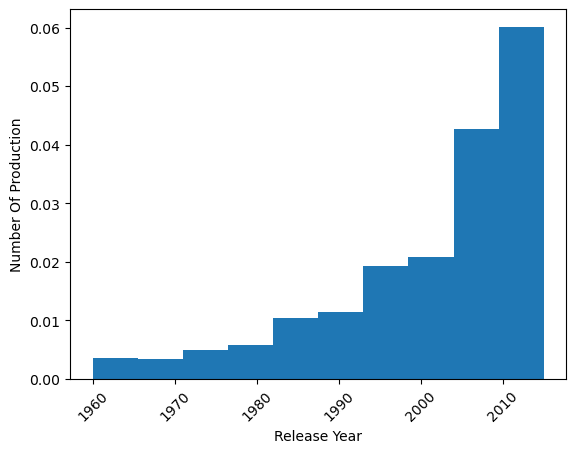

In [22]:
plt.hist( new_df['release_year'] ,density = 1) 
plt.xticks(rotation = 45)
plt.xlabel('Release Year')
plt.ylabel('Number Of Production')
plt.show()

It looks like after 2010 the production industries be so much more active and created a leap in the number of production.

### Research Question 1 (What is the most years earned high profit?!)

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
highest_provied_df=new_df.groupby(['release_year'],as_index=False)['net_profit'].sum().sort_values(by=['release_year'])

highest_provied_df.head()

,release_year,net_profit
0,1960,9.064920e+08
1,1961,2.127059e+09
2,1962,1.159535e+09
3,1963,8.122237e+08
4,1964,2.119616e+09


In [38]:
def desplay_plot(df ,col1 ,col2 ,color,lable,title,xlabel,ylabel):
   
    plt.barh(df[col1],df[col2],color=color,label=lable)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()    

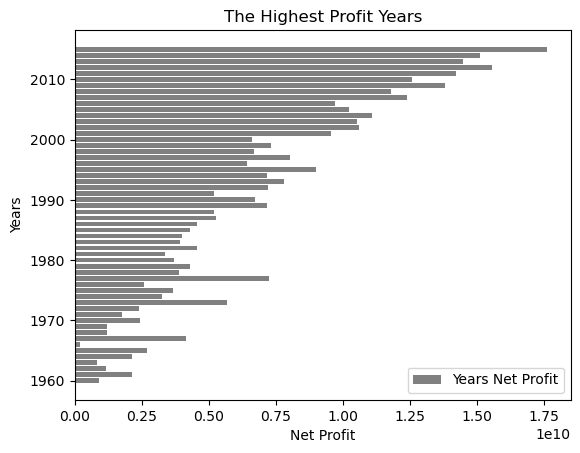

In [40]:
desplay_plot(highest_provied_df,'release_year','net_profit','grey','Years Net Profit','The Highest Profit Years','Net Profit','Years')

Text(0.5, 0, 'Years Most Net Profit')

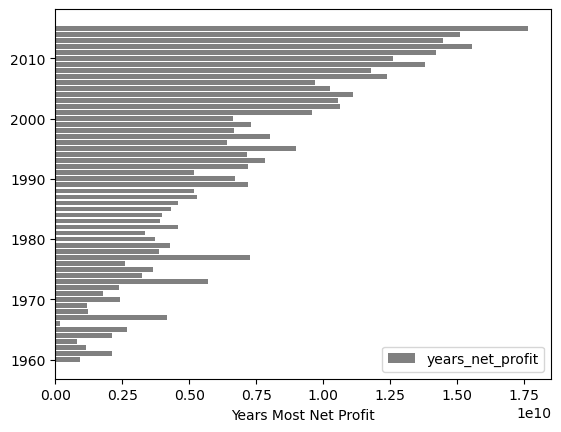

In [33]:
x1=highest_provied_df['release_year']
y1=highest_provied_df['net_profit']
plt.barh(x1,y1,color="grey",label='years_net_profit')
plt.legend()
plt.xlabel('Years Most Net Profit')

It seems the years after 2010 have the highest profit.

<a id='Q2_ID'></a>
### Research Question 2  (Which years have highest number of production?!)

In [18]:
most_produce_year_df=new_df.groupby(['release_year'],as_index=False)['original_title'].count().sort_values(by=['original_title'])

most_produce_year_df.head()

,release_year,original_title
1,1961,31
9,1969,31
0,1960,32
2,1962,32
3,1963,34


Text(0, 0.5, 'Movies Production Count')

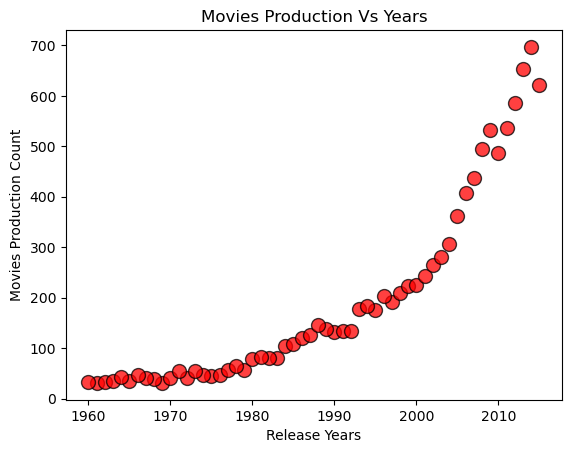

In [19]:
x2=most_produce_year_df['release_year']
y2=most_produce_year_df['original_title']
plt.scatter(x2,y2,s=100,c='Red', edgecolor='black',linewidth=1, alpha=0.75)
plt.title('Movies Production Vs Years')
plt.xlabel('Release Years')
plt.ylabel('Movies Production Count')



After 2010 also highest number of movies produced after it reach the most number the number has reduced.

<a id='Q3_ID'></a>
### Research Question 3  (Which genre got the highest profit & popularity?!)

In [20]:
genres_profit_df=new_df.assign(genres=new_df.genres.str.split('|')).explode('genres')
genres_profit_df.head()

,id,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj,net_profit
0,135397,32.985763,Jurassic World,124,Action,2015,137999939.3,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,124,Adventure,2015,137999939.3,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,124,Science Fiction,2015,137999939.3,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,124,Thriller,2015,137999939.3,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action,2015,137999939.3,3.481613e+08,2.101614e+08


Now we will split the genres and create new rows for each

In [21]:
highest_genres_provied_df=genres_profit_df.groupby(['genres'],as_index=False)['net_profit'].sum().sort_values(by=['net_profit'])

highest_genres_provied_df.head()

,genres,net_profit
9,Foreign,-1.118346e+08
20,notprovided,-2.808184e+04
16,TV Movie,8.953509e+06
5,Documentary,8.501937e+08
19,Western,3.564631e+09


Text(0.5, 0, 'Genres Net Profit')

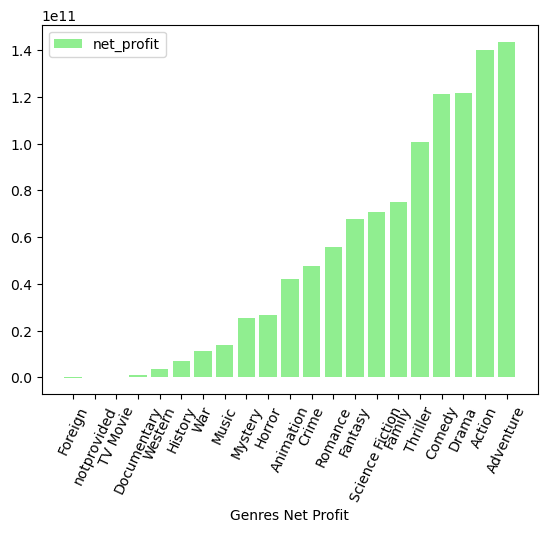

In [31]:
x3=highest_genres_provied_df['genres']
y3=highest_genres_provied_df['net_profit']
plt.bar(x3,y3,color="lightgreen",label='net_profit')
plt.xticks(rotation = 65)
plt.legend()
plt.xlabel('Genres Net Profit')

The most genre got profit was Adventure movies

In [24]:
highest_genres_popularity_df=genres_profit_df.groupby(['genres'],as_index=False)['popularity'].sum().sort_values(by=['popularity'])

highest_genres_popularity_df.head()

,genres,popularity
20,notprovided,3.781331
9,Foreign,35.931406
16,TV Movie,44.896373
5,Documentary,93.938089
19,Western,97.451554


Text(0.5, 0, 'Genres Popularity')

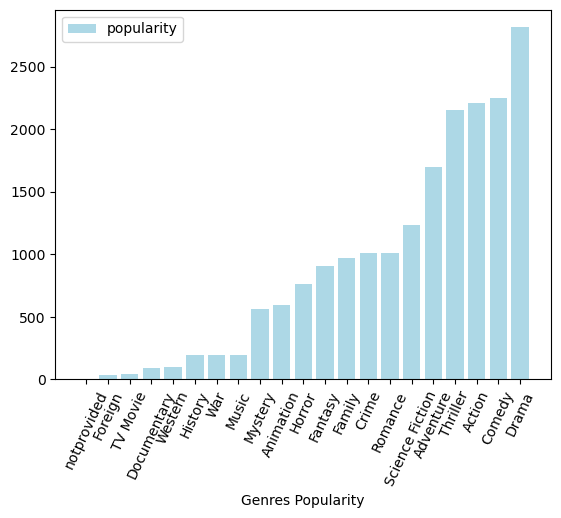

In [30]:
x4=highest_genres_popularity_df['genres']
y4=highest_genres_popularity_df['popularity']
plt.bar(x4,y4,color="lightblue",label='popularity')
plt.xticks(rotation = 65)
plt.legend()
plt.xlabel('Genres Popularity')

Here we find that may be Yes the Adventure movies have the highest profit but the Daram Movies have the highst populairty!! 

<a id='conclusions'></a>

## Conclusions

> #### After all the processes above we have some conclusions as the following :

> 1- The profit and the production numbers are running parallel. and we can see how the production industry has grown and it becomes produced a huge number of films over the years.

> 2- Movie production reduced in the last few years but the profit increased. that can happen because more audiences and cinema halls number have increased.

#### Limitations
>There is a big limitation here, as can be seen from the data processed above, many timelines number were not provided which forced us to exclude them. also, many movies' budget or revenues was zero which means the actual budget or revenues might be more.
